Import modules and data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import datetime

%matplotlib inline
#%matplotlib ipympl
%config InlineBackend.figure_format = 'retina'

from sklearn import preprocessing

Dataset info
Trip History Data from https://capitalbikeshare.com/system-data

Quarterly Capital Bikeshare trip data. The data includes:

    Duration – Duration of trip
    Start Date – Includes start date and time
    End Date – Includes end date and time
    Start Station – Includes starting station name and number
    End Station – Includes ending station name and number
    Bike Number – Includes ID number of bike used for the trip
    Member Type – Indicates whether user was a "registered" member (Annual Member, 30-Day Member or Day Key Member) or a "casual" rider (Single Trip, 24-Hour Pass, 3-Day Pass or 5-Day Pass)

This data has been processed to remove trips that are taken by staff as they service and inspect the system, trips that are taken to/from any of our “test” stations at our warehouses and any trips lasting less than 60 seconds (potentially false starts or users trying to re-dock a bike to ensure it's secure).
NOTE: The 3-Day Membership replaced the 5-Day Membership in Fall 2011

Beware inclusion of dockless bikes and e-scooters after a certain point.

Working towards KPIs for inclusivity

Decide which timeframe and dataset to use

In [2]:
df_2023_04 = pd.read_csv('202304-capitalbikeshare-tripdata.csv')

# First steps

check shape and column names

In [3]:
display(df_2023_04.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389243 entries, 0 to 389242
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             389243 non-null  object 
 1   rideable_type       389243 non-null  object 
 2   started_at          389243 non-null  object 
 3   ended_at            389243 non-null  object 
 4   start_station_name  360858 non-null  object 
 5   start_station_id    360858 non-null  float64
 6   end_station_name    358630 non-null  object 
 7   end_station_id      358630 non-null  float64
 8   start_lat           389243 non-null  float64
 9   start_lng           389243 non-null  float64
 10  end_lat             388555 non-null  float64
 11  end_lng             388555 non-null  float64
 12  member_casual       389243 non-null  object 
dtypes: float64(6), object(7)
memory usage: 38.6+ MB


None

In [4]:
display(df_2023_04.head())

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,7D89911108C4305F,classic_bike,2023-04-15 12:51:45,2023-04-15 12:57:14,16th & Harvard St NW,31135.0,Lamont & Mt Pleasant NW,31107.0,38.926102,-77.036650,38.931900,-77.038800,member
1,FF47021098DE06BD,electric_bike,2023-04-11 18:21:35,2023-04-11 18:37:47,Rosedale Rec Center,31658.0,6th St & Indiana Ave NW,31264.0,38.897897,-76.979721,38.894573,-77.019940,member
2,BB41905DB8DE1CC7,classic_bike,2023-04-16 18:09:23,2023-04-16 18:26:10,2nd St & Seaton Pl NE,31522.0,15th & W St NW,31125.0,38.914751,-77.003560,38.919018,-77.034449,member
3,0B1CB1A1E2380DD9,electric_bike,2023-04-29 17:13:36,2023-04-29 17:17:37,2nd St & Seaton Pl NE,31522.0,MBT & Bryant St NE,31531.0,38.914697,-77.003593,38.922404,-76.996023,member
4,D321DE32CAFDDD51,classic_bike,2023-04-29 17:53:46,2023-04-29 18:02:10,23rd & E St NW,31260.0,15th & M St NW,31298.0,38.896104,-77.049882,38.905424,-77.034674,member


In [5]:
#set ride_id as index
#TODO: find out if this is a bad idea
#df_2023_04.set_index('ride_id')

check for missing values

In [6]:
display("Empty fields:",df_2023_04.isnull().sum(), df_2023_04.isna().sum())

'Empty fields:'

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    28385
start_station_id      28385
end_station_name      30613
end_station_id        30613
start_lat                 0
start_lng                 0
end_lat                 688
end_lng                 688
member_casual             0
dtype: int64

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    28385
start_station_id      28385
end_station_name      30613
end_station_id        30613
start_lat                 0
start_lng                 0
end_lat                 688
end_lng                 688
member_casual             0
dtype: int64

check for duplicated values

In [7]:
display('Counts of duplicated items:', df_2023_04.drop('ride_id', axis = 1).duplicated().value_counts()) #why do i have to trop ride_id if it is the index? 
# also why did i get loads more results first time?

'Counts of duplicated items:'

False    389225
True         18
dtype: int64

There are 581 (or 18 ?? got two different results) duplicate records, once the unique ride ID is ignored.

In [8]:
df_2023_04[df_2023_04.drop('ride_id', axis = 1).duplicated(keep=False)].sort_values(by=['started_at'])

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
229411,EC87487562C28E93,classic_bike,2023-04-02 21:31:44,2023-04-02 21:54:18,USDA / 12th & C St SW,31217.0,20th & E St NW,31204.0,38.886277,-77.028242,38.896300,-77.045000,casual
229409,1845562C28A56D03,classic_bike,2023-04-02 21:31:44,2023-04-02 21:54:18,USDA / 12th & C St SW,31217.0,20th & E St NW,31204.0,38.886277,-77.028242,38.896300,-77.045000,casual
274578,02BAEE25CE7889D9,classic_bike,2023-04-07 12:37:35,2023-04-07 13:21:06,19th St & Constitution Ave NW,31235.0,1st & D St SE,31643.0,38.892212,-77.043074,38.884916,-77.005965,casual
274552,82BFA6942C47AC08,classic_bike,2023-04-07 12:37:35,2023-04-07 13:21:06,19th St & Constitution Ave NW,31235.0,1st & D St SE,31643.0,38.892212,-77.043074,38.884916,-77.005965,casual
185277,FD1FBFC11353FC0A,classic_bike,2023-04-09 13:53:40,2023-04-09 14:20:30,3000 Connecticut Ave NW / National Zoo,31307.0,1st & O St NW,31519.0,38.930282,-77.055599,38.908643,-77.012365,member
81569,08052F97EFABD88E,classic_bike,2023-04-09 13:53:40,2023-04-09 14:20:30,3000 Connecticut Ave NW / National Zoo,31307.0,1st & O St NW,31519.0,38.930282,-77.055599,38.908643,-77.012365,member
105108,9F691C5E28AF6256,classic_bike,2023-04-12 14:34:55,2023-04-12 15:18:48,Smithsonian-National Mall / Jefferson Dr & 12t...,31248.0,Henry Bacon Dr & Lincoln Memorial Circle NW,31289.0,38.888774,-77.028694,38.890539,-77.049383,casual
180957,DCEB1FEFC85ACBF0,classic_bike,2023-04-12 14:34:55,2023-04-12 15:18:48,Smithsonian-National Mall / Jefferson Dr & 12t...,31248.0,Henry Bacon Dr & Lincoln Memorial Circle NW,31289.0,38.888774,-77.028694,38.890539,-77.049383,casual
103669,BA2F8DE3F38F4CF2,classic_bike,2023-04-13 11:34:51,2023-04-13 12:13:33,Harvard St & Adams Mill Rd NW,31112.0,10th St & Constitution Ave NW,31219.0,38.927872,-77.043358,38.893028,-77.026013,member
116824,5DDB384604B22FF3,classic_bike,2023-04-13 11:34:51,2023-04-13 12:13:33,Harvard St & Adams Mill Rd NW,31112.0,10th St & Constitution Ave NW,31219.0,38.927872,-77.043358,38.893028,-77.026013,member


drop duplicates

In [9]:
#TODO

check and change data types

In [10]:
df_2023_04.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id      float64
end_station_name       object
end_station_id        float64
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [11]:
# cast 'started_at' and 'ended_at' columns to pandas 'datetime' object dtype https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
df_2023_04['started_at'] = pd.to_datetime(df_2023_04['started_at'])
df_2023_04['ended_at'] = pd.to_datetime(df_2023_04['started_at'])

#cast rideable_type and member_casual to categorical
df_2023_04['rideable_type'] = pd.Categorical(df_2023_04['rideable_type'], ordered=False)
df_2023_04['member_casual'] = pd.Categorical(df_2023_04['member_casual'], ordered=False)

df_2023_04.dtypes

ride_id                       object
rideable_type               category
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id             float64
end_station_name              object
end_station_id               float64
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual               category
dtype: object

check how many unique values are in each variable

In [12]:
display(df_2023_04.nunique())

ride_id               389243
rideable_type              3
started_at            343635
ended_at              343635
start_station_name       728
start_station_id         727
end_station_name         730
end_station_id           729
start_lat              76943
start_lng              77423
end_lat                  908
end_lng                  920
member_casual              2
dtype: int64

Note: there are more ride IDs than unique times

check unique vehicle types in this dataset and number of journeys using each

classic_bike     257729
electric_bike    113718
docked_bike       17796
Name: rideable_type, dtype: int64


<Axes: xlabel='rideable_type', ylabel='Count'>

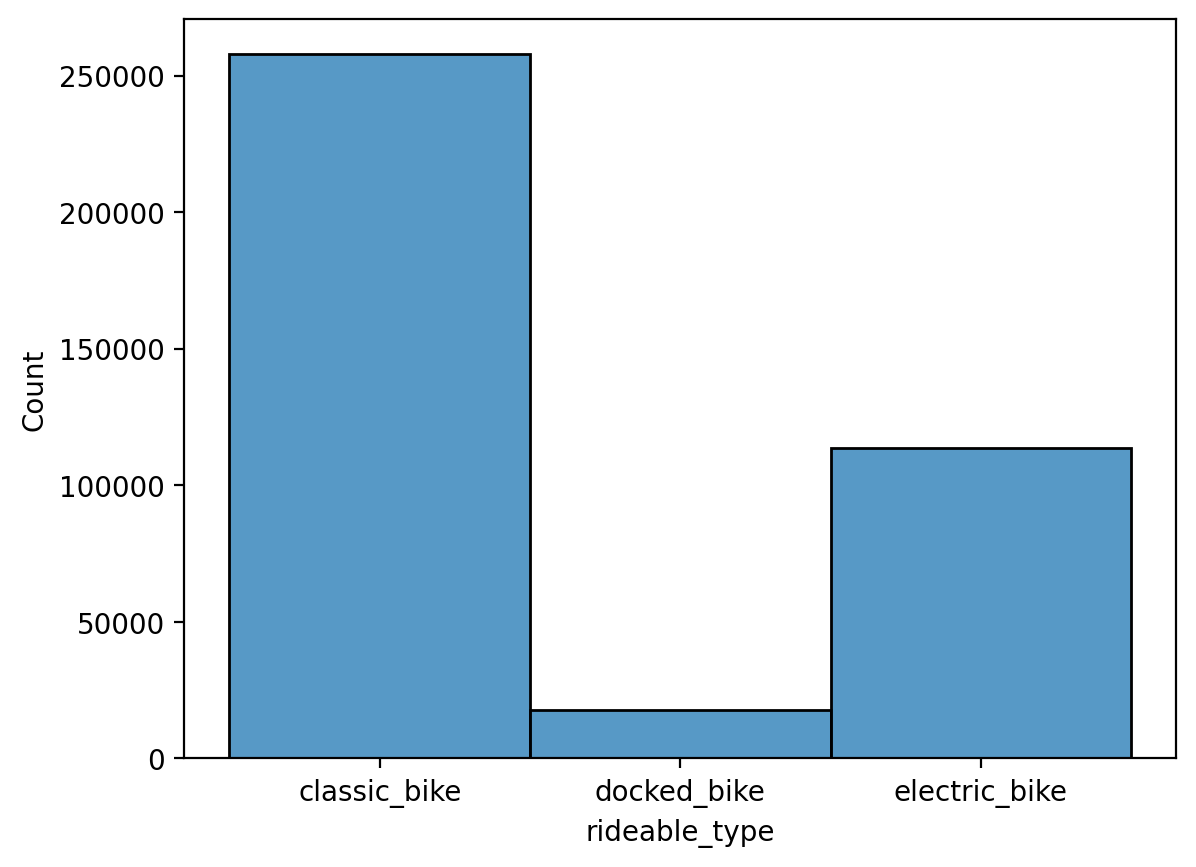

In [13]:
print(df_2023_04.rideable_type.value_counts())
sns.histplot(df_2023_04.rideable_type)

what is the difference between classic and docked bike? and do scooters not appear on the list?

In [14]:
#TODO: graph by type in time series (extract date from datetime for graph

In [56]:
#attempt: double grouping does not work well with any of the graphs I tried
df_date_r_t = df_2023_04.groupby(["rideable_type", df_2023_04["started_at"].dt.date]).count()
df_date_r_t = df_date_r_t.reset_index()

ValueError: cannot insert started_at, already exists

In [46]:
#first, plot all journeys' counts by date
#begin with a series of counts grouped by date 
#df_per_date = df_2023_04["started_at"].groupby(df_2023_04["started_at"].dt.date).count()
#df_per_date

df_per_date2 = df_2023_04.groupby([(df_2023_04["started_at"].dt.date), "rideable_type"]).count()
df_per_date2


# df_per_date_m_c = df_2023_04["rideable_type"].groupby(df_2023_04["started_at"].dt.date).count()
# df_per_date_m_c = pd.DataFrame(df_per_date_m_c).reset_index()
# df_per_date_m_c

ValueError: cannot insert started_at, already exists

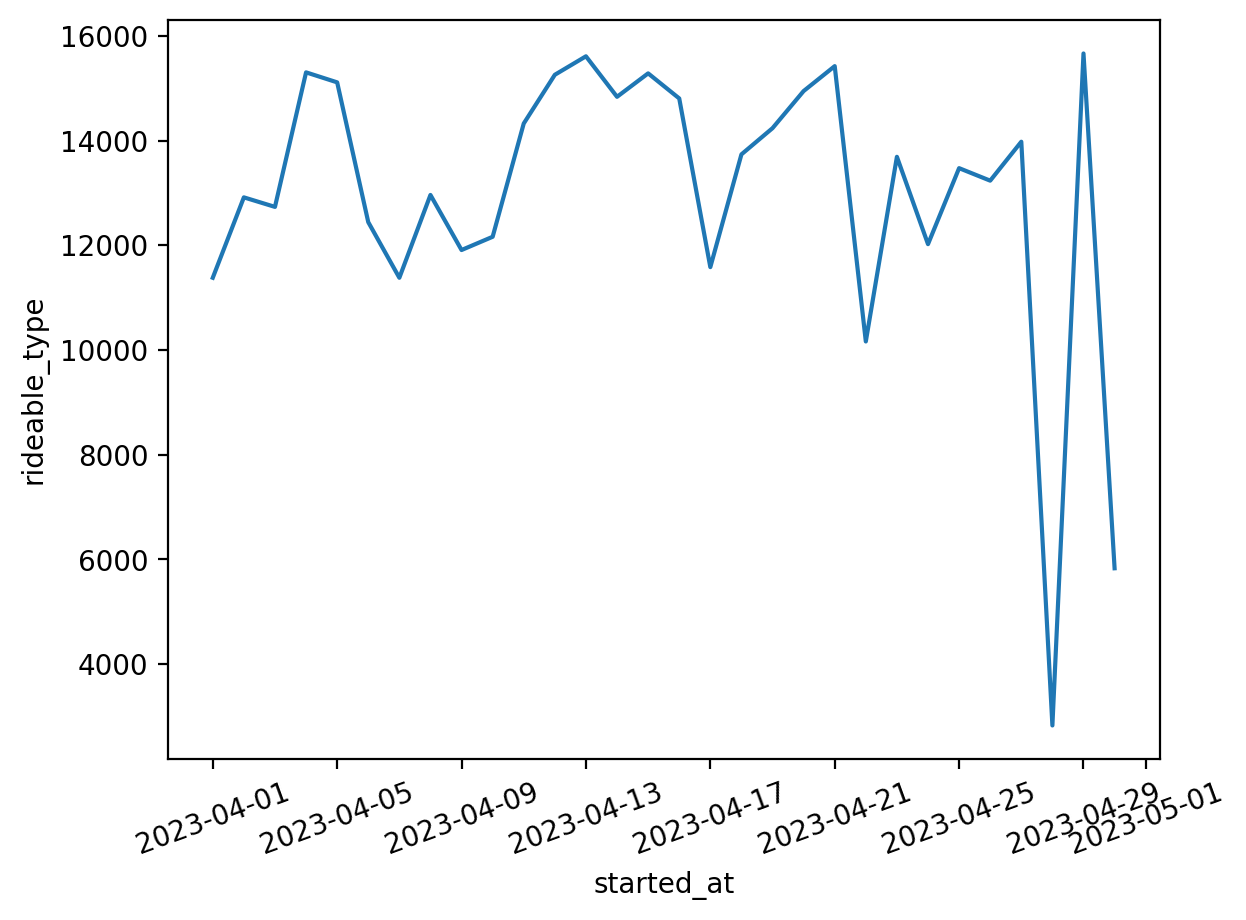

In [38]:
# make a line plot with three lines for daily counts of vehicle types

sns.lineplot(x="started_at", y="rideable_type", data=df_per_date_m_c)

plt.xticks(rotation=20)

plt.show()

In [26]:

#TODO: problem: all rides on one day are now grouped, and vehicle type is lost. maybe better to stack 2 graphs after all.
#TODO: include or otherwise filter. merge 2 graphs into 1 plot? use seaborn hue?
sns.lineplot(data= df_2023_04["started_at"].dt.date, hue="rideable_type")


ValueError: The following variable cannot be assigned with wide-form data: `hue`

# Histplot/univariate plots

In [ ]:
sns.set_theme(style="whitegrid", palette="pastel")

sns.pairplot(df_2023_04.drop(columns = ['start_station_id', 'end_station_id'], axis = 1))
plt.suptitle('Univariate plots April 2023')

In [ ]:
sns.displot(data=df_2023_04.started_at.dt.hour)
#TODO next: extract day, hour, month from datetime object

# Scatterplots: Do registered riders ride further?

In [ ]:
#TODO

In [ ]:
# fig, axes=plt.subplots(1,2)

# sns.set_style('darkgrid')
# sns.scatterplot(ax=axes[0], data=df_hour, y=df_hour.cnt, x=df_hour.windspeed, hue='registered_proportion')
# axes[0].set_title('Windspeed')

# sns.scatterplot(ax=axes[1],data=df_hour, y=df_hour.cnt, x=df_hour.temp, hue='registered_proportion')
# axes[1].set_title('Temperature (Normalized)')

# fig.suptitle('Count of rides by windspeed and temperature')

# plt.tight_layout()

## Boxplot of day-wise Distribution

In [ ]:
#TODO: sns.boxplot(data=df_2023_04, x='', y='')

# Trips per day per bicycle (TDB)
This is a metric proposed for the success of a bike sharing scheme bye Médard de Chardon et al. (2017)

# Multivariate analysis: heatmap

In [ ]:
#TODO

# Time Series Analysis

# Time Series line graphs

In [ ]:
# x = df_day['dteday']
# y = df_day['cnt']

# plt.plot(x, y)

# plt.title('Rides per day')
# plt.xlabel('Date')
# plt.ylabel('Rides')

Linear regression with time series

In [ ]:
#TODO

In [54]:
import pandas as pd
multi_index = pd.MultiIndex.from_tuples([("r0", "rA"),
                                       ("r1", "rB")],
                                       names=['Courses','Fee'])
cols = pd.MultiIndex.from_tuples([("Gasoline", "Toyoto"), 
                                  ("Gasoline", "Ford"), 
                                  ("Electric", "Tesla"),
                                  ("Electric", "Nio")])

data=[[100,300, 900,400 ], [200,500, 300,600]]

df = pd.DataFrame(data, columns=cols,index=multi_index)
print(df)

            Gasoline      Electric     
              Toyoto Ford    Tesla  Nio
Courses Fee                            
r0      rA       100  300      900  400
r1      rB       200  500      300  600


In [ ]:

# MultiIndex to Single Index
df2 = df.reset_index(level=[1])
print(df2)


In [55]:

# Convert Multi-index to Columns
df2=df.reset_index()
print(df2)


  Courses Fee Gasoline      Electric     
                Toyoto Ford    Tesla  Nio
0      r0  rA      100  300      900  400
1      r1  rB      200  500      300  600
